In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
iris = datasets.load_iris()
X = iris.data        # Features (petal length, width, etc.)
y = iris.target

In [25]:
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = y
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})


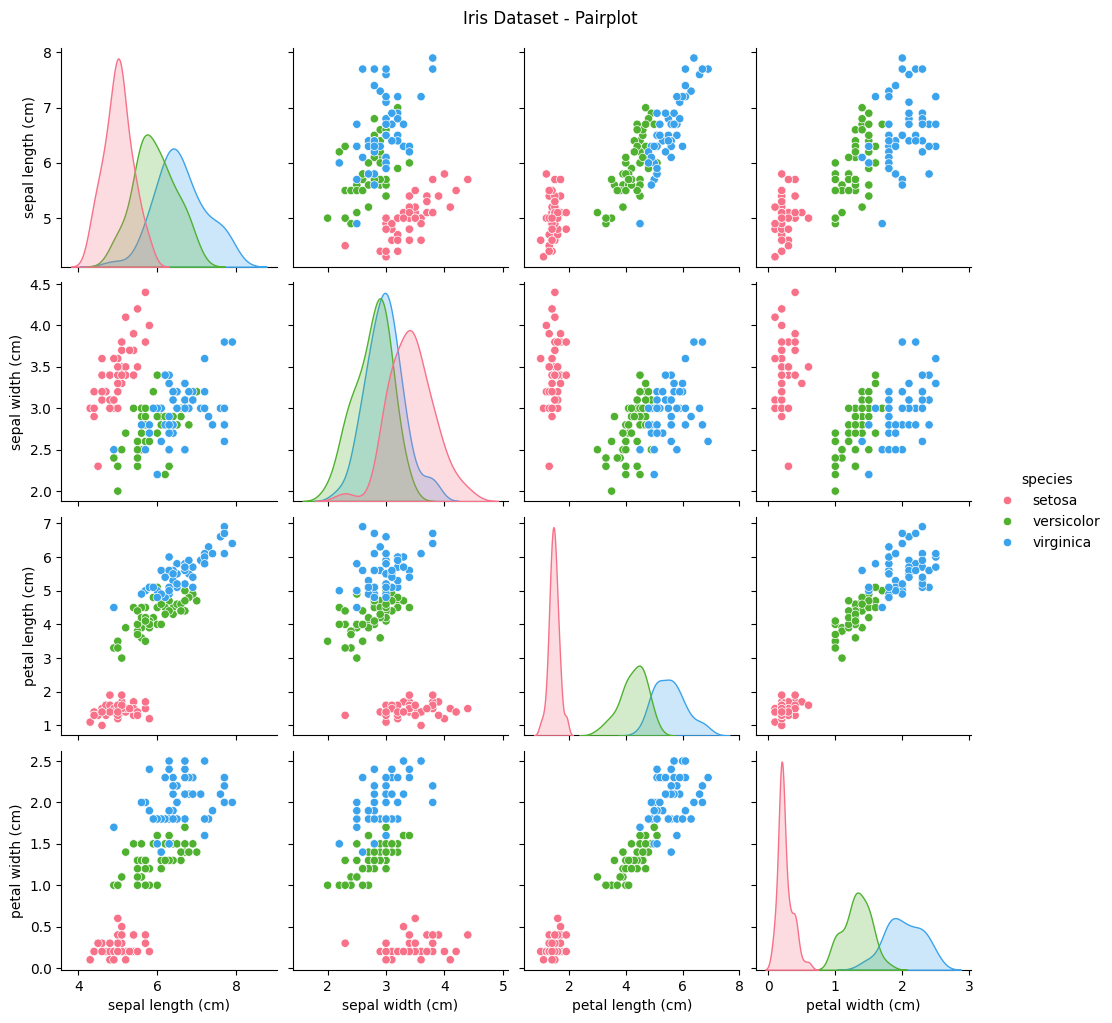

In [26]:
sns.pairplot(df, hue="species", diag_kind="kde", palette="husl")
plt.suptitle("Iris Dataset - Pairplot", y=1.02)
plt.show()

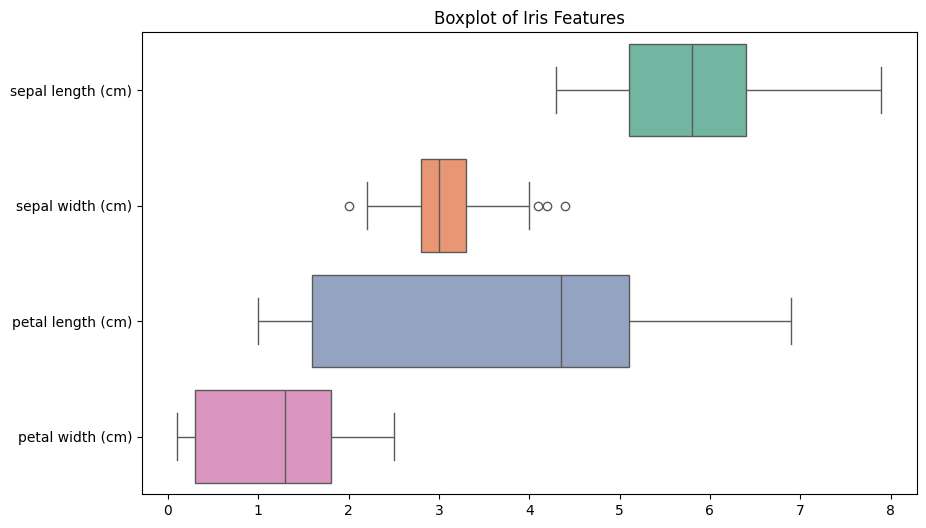

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot of Iris Features")
plt.show()

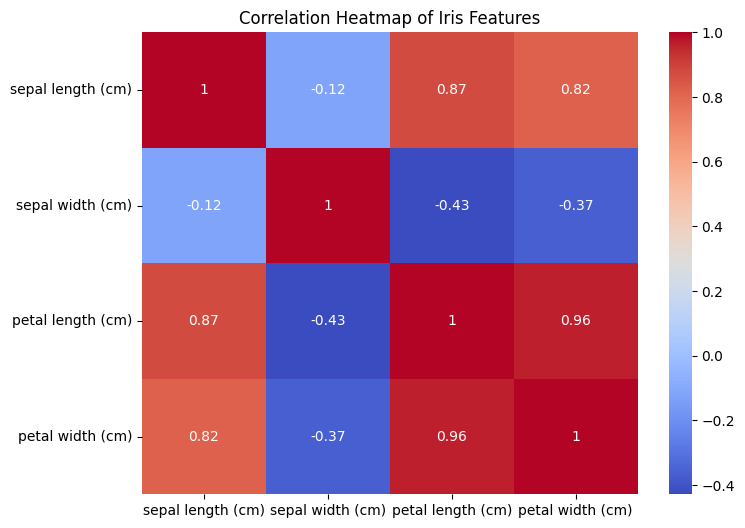

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

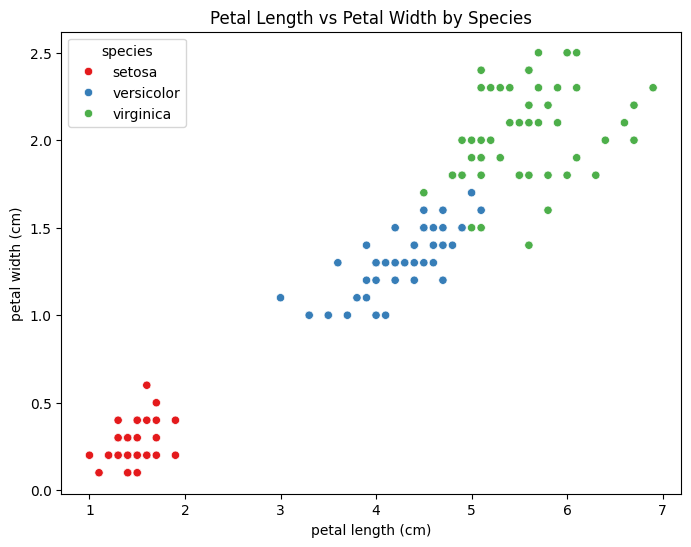

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="species", data=df, palette="Set1")
plt.title("Petal Length vs Petal Width by Species")
plt.show()

In [30]:
#  2 classes (Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [33]:
W = np.zeros(X_train.shape[1])
b = 0                           # Bias

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [35]:
def compute_cost(X, y, W, b, lambda_):
    m = len(y)
    h = sigmoid(np.dot(X, W) + b)
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    cost += (lambda_ / (2 * m)) * np.sum(W**2)
    return cost

In [36]:
def gradient_descent(X, y, W, b, learning_rate, lambda_, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        h = sigmoid(np.dot(X, W) + b)
        dw = (1/m) * np.dot(X.T, (h - y)) + (lambda_ / m) * W
        db = (1/m) * np.sum(h - y)
        W -= learning_rate * dw
        b -= learning_rate * db


        if i % 100 == 0:
            cost = compute_cost(X, y, W, b, lambda_)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return W, b  # Final trained weights and bias return

In [37]:
learning_rate = 0.1
lambda_ = 0.1
num_iterations = 1000
W, b = gradient_descent(X_train, y_train, W, b, learning_rate, lambda_, num_iterations)

Iteration 0, Cost: 0.6249
Iteration 100, Cost: 0.0507
Iteration 200, Cost: 0.0300
Iteration 300, Cost: 0.0231
Iteration 400, Cost: 0.0198
Iteration 500, Cost: 0.0179
Iteration 600, Cost: 0.0167
Iteration 700, Cost: 0.0158
Iteration 800, Cost: 0.0153
Iteration 900, Cost: 0.0148


In [38]:
def predict(X, W, b):
    probabilities = sigmoid(np.dot(X, W) + b)
    return probabilities >= 0.5

In [39]:
y_pred = predict(X_test, W, b)
acc = accuracy_score(y_test, y_pred)
print(f"\nFinal Accuracy on test set: {acc * 100:.2f}%")


Final Accuracy on test set: 100.00%
